In [15]:
import os
from pathlib import Path

import cv2
import matplotlib.pyplot as plt
import numpy as np
import torch

from src.dataset import COCODataset
from dotenv import load_dotenv
from src.augmentations import train_transform
from src.visualization import put_mask_on_image

load_dotenv()

True

In [16]:
dataset_path = Path(os.environ['dataset_path'])
image_dir = dataset_path / "LIVECell_dataset_2021" / 'images'
annotations_file = dataset_path / "LIVECell_dataset_2021" / "annotations" / "LIVECell" / "livecell_coco_val.json"

In [17]:
def plot_mask_bbox(image: torch.Tensor, boxes: np.array, masks: np.array, ax):
    """Visualization instance of dataset after augmentation

    Args:
        image: torch.Tensor with shape [1, height, width]
        boxes: torch.Tensor with shape [N, 4] with N being number of boxes
        masks: torch.Tensor with shape [N, height, width]
    """
    image_with_mask = put_mask_on_image(image, masks)

    # Drawing red rectangle for each instances
    red_color = (255, 0, 0)
    for x1, y1, x2, y2 in boxes:
        image_with_mask = cv2.rectangle(image_with_mask.copy(), pt1=(int(x1), int(y1)), pt2=(int(x2), int(y2)),
                                        color=red_color, thickness=2)

    ax.imshow(image_with_mask)
    ax.set_xticks([])
    ax.set_yticks([])


In [18]:
dataset = COCODataset(image_dir=image_dir, annotation_file=annotations_file, transform=train_transform)

len(dataset), dataset[0]

(570,
 (tensor([[[ 0.0741,  0.0741,  0.0227,  ...,  0.0741,  0.0741,  0.0569],
           [ 0.0912,  0.0569,  0.0569,  ...,  0.0741,  0.0569,  0.0569],
           [ 0.0912,  0.0912,  0.0741,  ...,  0.0912,  0.0912,  0.0741],
           ...,
           [-0.4397, -0.1314,  0.2111,  ...,  0.0569,  0.0569,  0.0569],
           [-0.0458, -0.3541, -0.0801,  ...,  0.0569,  0.0912,  0.0741],
           [ 0.1254, -0.2684, -0.3027,  ...,  0.0569,  0.0912,  0.0741]]]),
  {'masks': tensor([[[0, 0, 0,  ..., 0, 0, 0],
            [0, 0, 0,  ..., 0, 0, 0],
            [0, 0, 0,  ..., 0, 0, 0],
            ...,
            [0, 0, 0,  ..., 0, 0, 0],
            [0, 0, 0,  ..., 0, 0, 0],
            [0, 0, 0,  ..., 0, 0, 0]],
   
           [[0, 0, 0,  ..., 0, 0, 0],
            [0, 0, 0,  ..., 0, 0, 0],
            [0, 0, 0,  ..., 0, 0, 0],
            ...,
            [0, 0, 0,  ..., 0, 0, 0],
            [0, 0, 0,  ..., 0, 0, 0],
            [0, 0, 0,  ..., 0, 0, 0]],
   
           [[0, 0, 0,  ..., 

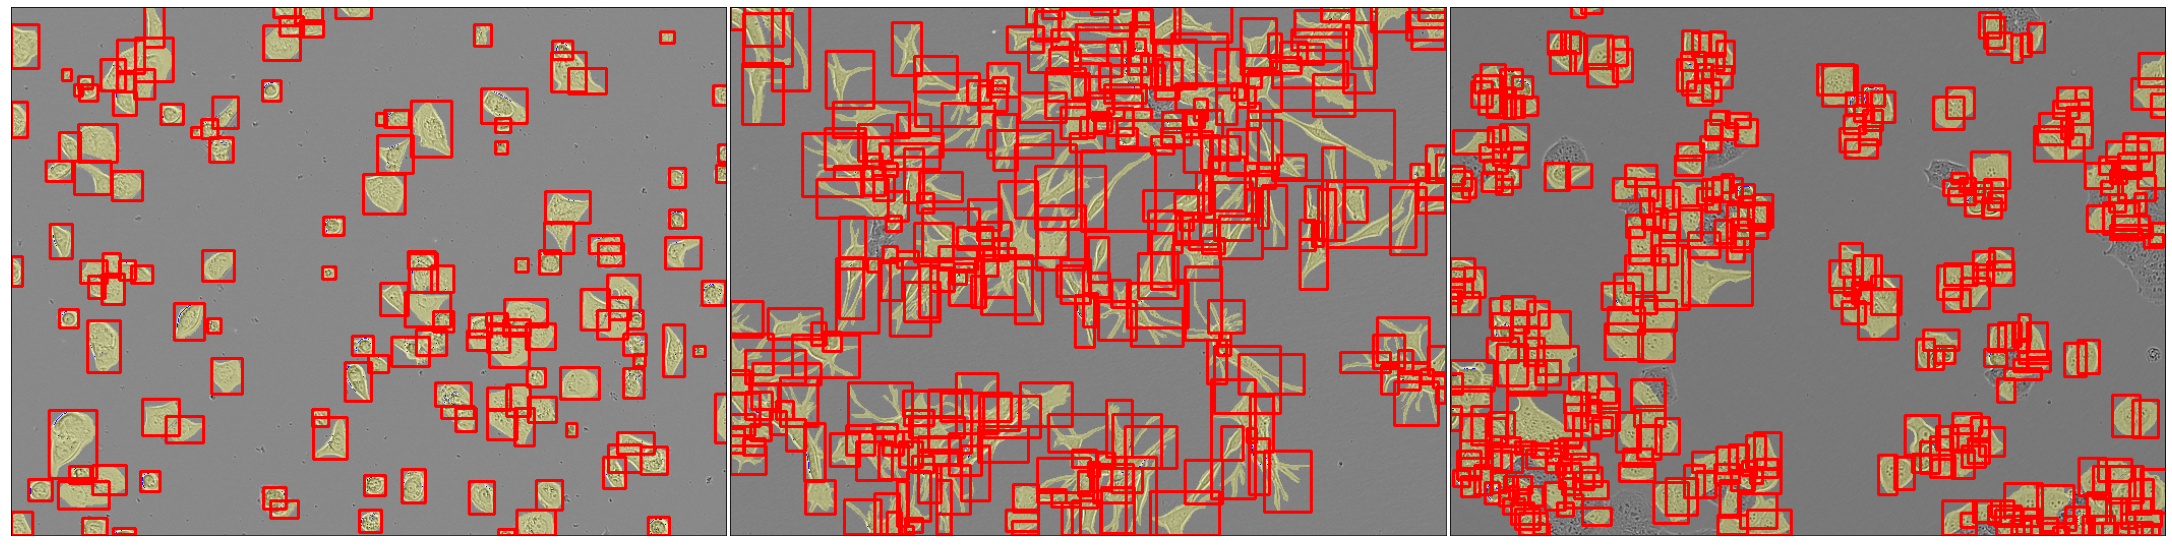

In [20]:
fig, axes = plt.subplots(ncols=3, figsize=(30, 10))

image1, target1 = dataset[0]
plot_mask_bbox(image1, boxes=target1['boxes'], masks=target1['masks'], ax=axes[0])

image2, target2 = dataset[500]
plot_mask_bbox(image2, boxes=target2['boxes'], masks=target2['masks'], ax=axes[1])

image3, target3 = dataset[200]
plot_mask_bbox(image3, boxes=target3['boxes'], masks=target3['masks'], ax=axes[2])



plt.tight_layout(h_pad=0.1, w_pad=0.1, pad=0.1)
plt.show()
# fig.savefig("../figures/data_visualisation.png")